# Setting up the problem which is the travelling salesman problem

we will randomly generate a map for our salesman to traverse from. We start with selecting some number N that will represent the number of cities we want on the map.

Lets say N = 40 sets of coordinates: one x and one y value for each city, we will use the numpy volume for the random selection

In [1]:
import numpy as np
random_seed = 1729
np.random.seed(random_seed)
N = 40
x = np.random.rand(N)
y = np.random.rand(N)

In [2]:
# we will basically zip the values of x and y together to create cities, a list containing 40 pairs of x and y values is basically generated
points = zip(x,y)
cities = list(points)

In [3]:
print(cities)

[(0.21215859519373315, 0.1421890509660515), (0.25901824052776146, 0.4415438502354807), (0.42352187994602863, 0.6384708617951832), (0.7196610137879806, 0.4541115917001236), (0.6922509256107934, 0.9795099465634718), (0.7281748161649396, 0.497003900057289), (0.2875498733527475, 0.987892114481641), (0.25408333020469553, 0.9438765028592432), (0.9609289991025697, 0.31254425748246295), (0.5652066087690863, 0.527268363065508), (0.0669470282293596, 0.743806143933605), (0.7333909009768429, 0.9080655744313583), (0.5097899289931794, 0.9438536218932465), (0.2275735994122996, 0.8300476280141759), (0.34145108286419, 0.2560140784278434), (0.5119931773955035, 0.04764567825851673), (0.9607228565214858, 0.3459590815475251), (0.6140544248143194, 0.22568954246099482), (0.7524005962652125, 0.5691469284846282), (0.9003957980585882, 0.6872708115099813), (0.3471312754415167, 0.3122221374834556), (0.6550253186247254, 0.6860405486796042), (0.39706771454841694, 0.6586237030125843), (0.12686022007415232, 0.7679194

In [4]:
# itinerary variable will store the cities in a list based on the order we visit the first time
itinerary = list(range(0,N))

In [5]:
itinerary

[0,
 1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 28,
 29,
 30,
 31,
 32,
 33,
 34,
 35,
 36,
 37,
 38,
 39]

Now we will need to judge this itinerary and decide whether it represents a good or at least acceptable solution to the TSP.

The point of the TSP will be to minimize the travel cost of the salesman when he travels between cities

So the cost of the travel can be any you imagine

lets imagine to travel between 2 cities is 1 dollar and we want to minimize this cost

To determine the distance required by a particular itinerary, we need to define two new functions. First we need a function tat will generate a collection of lines that will connect all points, after that we need to sum up the distance represented by those lines

In [6]:
lines = []

In [7]:
#iterating over every city and at each step we will be adding a new line to our lines connection that connects the current city and the city after it

for j in range(0,len(itinerary) - 1):
    lines.append([cities[itinerary[j]], cities[itinerary[j+1]]])

In [8]:
print(lines)

[[(0.21215859519373315, 0.1421890509660515), (0.25901824052776146, 0.4415438502354807)], [(0.25901824052776146, 0.4415438502354807), (0.42352187994602863, 0.6384708617951832)], [(0.42352187994602863, 0.6384708617951832), (0.7196610137879806, 0.4541115917001236)], [(0.7196610137879806, 0.4541115917001236), (0.6922509256107934, 0.9795099465634718)], [(0.6922509256107934, 0.9795099465634718), (0.7281748161649396, 0.497003900057289)], [(0.7281748161649396, 0.497003900057289), (0.2875498733527475, 0.987892114481641)], [(0.2875498733527475, 0.987892114481641), (0.25408333020469553, 0.9438765028592432)], [(0.25408333020469553, 0.9438765028592432), (0.9609289991025697, 0.31254425748246295)], [(0.9609289991025697, 0.31254425748246295), (0.5652066087690863, 0.527268363065508)], [(0.5652066087690863, 0.527268363065508), (0.0669470282293596, 0.743806143933605)], [(0.0669470282293596, 0.743806143933605), (0.7333909009768429, 0.9080655744313583)], [(0.7333909009768429, 0.9080655744313583), (0.509789

In [9]:
# we will now put these functions called the genlines
def genlines(cities, itinerary):
    lines = []
    for j in range(0,len(itinerary) - 1):
        lines.append([cities[itinerary[j]], cities[itinerary[j+1]]])
    return lines

#### we will now be using the pythagoras theorem to get the distance of each line

In [10]:
import math
def howfar(lines):
    distance = 0
    for j in range(0,len(lines)):
        distance += math.sqrt(abs(lines[j][1][0] - lines[j][0][0])**2 + abs(lines[j][1][1] - lines[j][0][1])**2)
    return distance

In [11]:
totaldistance = howfar(genlines(cities, itinerary))
print(totaldistance)

16.808756356994223


In [12]:
# imagining how the plot and the lines look like
import matplotlib.collections as mc
import matplotlib.pylab as pl
def plotitinerary(cities, itin, plottitle, thename):
    lc = mc.LineCollection(genlines(cities, itin), linewidths = 2)
    fig, ax = pl.subplots()
    ax.add_collection(lc)
    ax.autoscale()
    ax.margins(0.1)
    pl.scatter(x,y)
    pl.title(plottitle)
    pl.xlabel('X Coordinate')
    pl.ylabel('Y Coordinate')
    pl.savefig(str(thename)+'.png')
#     pl.close()

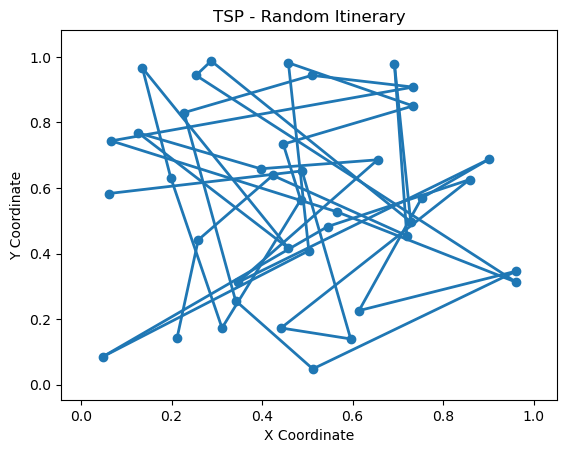

In [13]:
plotitinerary(cities, itinerary, 'TSP - Random Itinerary', 'figure-2')

In [14]:
# We can tell just by looking at the figure that this shit craizy

# The goal of the rest of the chapter is to optimize this craizy piece

# finally the section of tradin a little complexity for a lot of performance improvement

# Brain vs Brawn

Here brawn refers to brute forcing all the distance calculation between all the points and then calculating the solution

However in the case of TSP the runtime grows far too fast for the cities greater than the number 20

for eg if we have N cities than the number of calulation for the distances will be N!

### This phenomenon is called combinatorial explosion

### The brain here will be algorithms to simplify the process such that we dont brute force everything

# The nearest neighbor algorithm

we will start with the first city on the list, and then we simply find the closest unvisited city to the first city and visit that city

repeat it and you wont get minimum but it will take a very less time compared to the brute force

In [15]:
# Function for finding the nearest neighbor for any given city

point = [0.5,0.5]
j= 10
distance = math.sqrt((point[0] - cities[j][0])**2+(point[1] - cities[j][1])**2)

for finding which point is closest,we need to iterate over every city and check the distance between the point and every city

In [16]:
def findnearest(cities, idx, nnitinerary):
    point = cities[idx]
    mindistance = float('inf')
    minidx = -1
    for j in range(0,len(cities)):
        distance = math.sqrt((point[0] - cities[j][0])**2 + (point[1] - cities[j][1])**2)
        if distance < mindistance and distance>0 and j not in nnitinerary:
            mindistance = distance
            minidx = j
    return minidx

our goal will now be to create a new itinerary called the nnitinerary which start with the first city as 

In [17]:
nnitinerary = [0]

if it needs to have N cities than we iterate over all numbers 0 to N

In [18]:
def donn(cities, N):
    nnitinerary = [0]
    for j in range(0,N-1):
        next = findnearest(cities, nnitinerary[len(nnitinerary) - 1], nnitinerary)
        nnitinerary.append(next)
    return nnitinerary

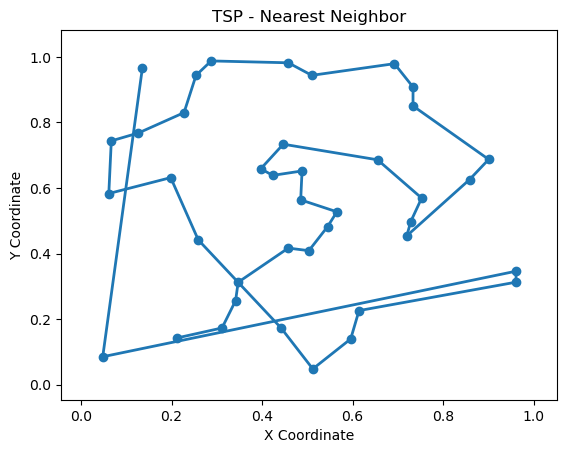

In [19]:
plotitinerary(cities, donn(cities, N), "TSP - Nearest Neighbor", 'figure - 3')

In [20]:
print(howfar(genlines(cities, donn(cities, N))))

6.29000579854535


# Checking for further improvements

## we will try to change the order of the cities that have been provided originally

In [21]:
def perturb(cities, itinerary):
    neighborids1 = math.floor(np.random.rand() * len(itinerary))
    neighborids2 = math.floor(np.random.rand() * len(itinerary))
    
    itinerary2 = itinerary.copy()
    
    itinerary2[neighborids1] = itinerary[neighborids2]
    itinerary2[neighborids2] = itinerary[neighborids1]
    
    distance1 = howfar(genlines(cities, itinerary))
    distance2 = howfar(genlines(cities, itinerary2))
    
    itinerarytoreturn = itinerary.copy()
    
    if distance1>distance2:
        itinerarytoreturn = itinerary2.copy()
    
    return itinerarytoreturn.copy()

Now that we have a perturb function , let us call it repeatedly on a random itinerary

In [22]:
itinerary = [0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39]

np.random.seed(random_seed)
itinerary_ps = itinerary.copy()
for n in range(0, len(itinerary)*50000):
    itinerary_ps = perturb(cities, itinerary_ps)
    
print(howfar(genlines(cities, itinerary_ps)))

7.37962855396978


## what we just implemented is known as perturb search algorithm

# We only need to make a few more adjustments to this algorithm to make the simulated annealing that is the capstone of this chapter

# The above 2 algorithms which is the nearest neighbor and the perturb search algorithms are called greedy search algorithms

# Introducing the temperature function

To do worse with the intention of eventually doing better is a delicate undertaking. if we are overzealous in our willingness to do worse, we might just go downward at every step and get to a low point instead of a high one.

we need to find a way to do worse only a little, only occasionally and only in the context of learning how to eventually do better.

To understand what we will be doing we have an example:
    
    Suppose we want to climb a mountain in a day but also try to finish it before it gets dark and very cold.
    
    We start in the late afternoon and know that we have only 2 hours to find the highest point 
    
    Suppose we also dont have a watch to keep track of time but we know that the air gradually cools down in the evening, so we decide to use the temperature as a way to gauge approximately how much time we have left to find the highest point
    
    At the beginning of our 2 hours when its relatively hot outside, it is natural for us to be open to creative exploration. Since we have a long time remaining, its not a big risk to travel downward in order to understand the terrain better and also find some new places
    
    but as it gets colder and we near our 2 hours, we will be less open to broad exploration. We will be more narrowly focused on improvements and less willing to travel downward

### In order to model this scenario we will define a function and start with a hot temperature and a willingess to explore and go downward, and we will end with a cool temperature and an unwillingness to go downward

In [23]:
temperature = lambda t:1/(t+1)

We can understand a simple plot of the temperature function by the code provided below

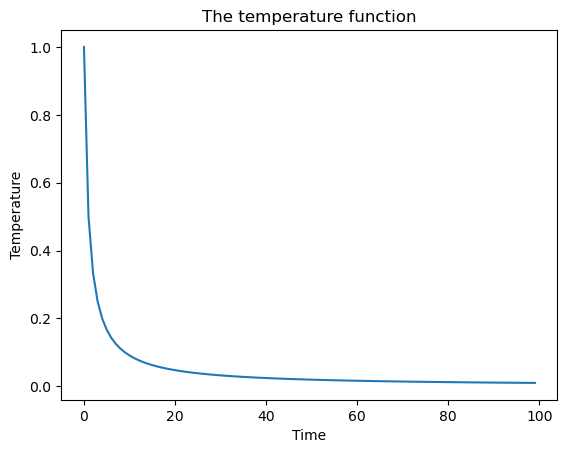

In [24]:
import matplotlib.pyplot as plt
ts = list(range(0,100))
plt.plot(ts, [temperature(t) for t in ts])
plt.title('The temperature function')
plt.xlabel('Time')
plt.ylabel('Temperature')
plt.show()

### This temperature will be used as a scheduule that will govern our optimization

# Simulated annealing

### Bringing all of our ideas together: the temperature function, the searh problem in hilly terrain, the perturb search algorithm, and the TSP

#### Simulated annealing is different from the perturb search algorithm only because we are sometimes willing to accept itinerary changes that increase the distance travelled, because this enables us to avoid the problem of local optimization. Our willingness to accept worse itineraries depends on the current temperature

In [25]:
# modifying our perturb algorithm with a new argument time
# the time measures how far we are through the simulated annealing process, the first time we call perturb time = 1, and then 2 and then 3 as many times as we call perturb it will increase

def perturb_sa1(cities, itinerary, time):
    neighborids1 = math.floor(np.random.rand() * (len(itinerary)))
    neighborids2 = math.floor(np.random.rand() * (len(itinerary)))
    
    itinerary2 = itinerary.copy()
    
    itinerary2[neighborids1] = itinerary[neighborids2]
    itinerary2[neighborids2] = itinerary[neighborids1]
    
    distance1 = howfar(genlines(cities, itinerary))
    distance2 = howfar(genlines(cities, itinerary2))
    
    itinerarytoreturn = itinerary.copy()
    
    randomdraw = np.random.rand()
    temperature = 1/((time/1000)+1)
    
    if distance2 > distance1 and randomdraw < temperature or distance1>distance2:
        itinerarytoreturn = itinerary2.copy()
        
    return itinerarytoreturn.copy()

In [ ]:
# Comparing the performance of simulated annealing with searh algorithm and nearest neighbor as follows

itinerary = [i for i in range(0,40)]
np.random.seed(random_seed)
itinerary_sa = itinerary.copy()
for n in range(0,len(itinerary)*50000):
    itinerary_sa = perturb_sa1(cities, itinerary_sa, n)
    
print(howfar(genlines(cities,itinerary))) #random itinerary
print(howfar(genlines(cities,itinerary_ps))) #perturb search
print(howfar(genlines(cities,itinerary_sa))) #simulated annealing
print(howfar(genlines(cities,donn(cities,N)))) #nearest neighbor

# now we will talk about the fine tuning of our simulated annealing algorithm

the way we perturbed our itinerary was one way of perturbing, we can perturb the data in any way we want

hence another way to perturb data is by reversing some portion of the data: take a subset of cities and visit them in opposite order

In [ ]:
# reversing in one line
small = 10
big = 20
itinerary = [i for i in range(0,40)]
itinerary[small:big] = itinerary[small:big][::-1]
print(itinerary)

another way to also perturb is to lift a section from where it is and place it to another part of the itinerary

In [ ]:
itinerary = [i for i in range(0,10)]

In [ ]:
# and move the section [1,2,3,4] to the later part of it
itinerary = [0,5,6,7,8,1,2,3,4,9]

In [ ]:
# we can do this type of lifting and moving, which will move a chosen section to a random location
small = 1
big = 5
itinerary = [i for i in range(0,10)]
tempitin = itinerary[small:big]
del(itinerary[small:big])
np.random.seed(random_seed+1)
neighborids3 = math.floor(np.random.rand() * len(itinerary))
for j in range(0, len(tempitin)):
    itinerary.insert(neighborids3 + j, tempitin[j])

In [ ]:
itinerary

We can update our perturb() function so that it randomly alternates
between these different perturbing methods. We’ll do this by making
another random selection of a number between 0 and 1. If this new ran-
dom number lies in a certain range (say, 0–0.45), we’ll perturb by revers-
ing a subset of cities, but if it lies in another range (say, 0.45–0.55), we’ll
perturb by switching the places of two cities. If it lies in a final range (say,
0.55–1), we’ll perturb by lifting and moving a subset of cities. In this way,
our perturb() function can randomly alternate between each type of per-
turbing. We can put this random selection and these types of perturbing
into our new function, now called perturb_sa2(), as shown 

In [ ]:
def perturb_sa2(cities, itinerary, time):
    neighborids1 = math.floor(np.random.rand() * len(itinerary))
    neighborids2 = math.floor(np.random.rand() * len(itinerary))
    
    itinerary2 = itinerary.copy()
    
    randomdraw2 = np.random.rand()
    small = min(neighborids1, neighborids2)
    big = max(neighborids1, neighborids2)
    if(randomdraw2>=0.55):
        itinerary2[small:big] = itinerary[small:big][::-1]
    elif randomdraw2<0.45:
        tempitin = itinerary[small:big]
        del(itinerary2[small:big])
        neighborids3 = math.floor(np.random.rand() * len(itinerary))
        for j in range(0,len(tempitin)):
            itinerary2.insert(neighborids3 + j, tempitin[j])
    else:
        itinerary2[neighborids1] = itinerary[neighborids2]
        itinerary2[neighborids2] = itinerary[neighborids1]
        
    distance1 = howfar(genlines(cities, itinerary))
    distance2 = howfar(genlines(cities, itinerary2))
    
    itinerarytoreturn = itinerary.copy()
    
    randomdraw = np.random.rand()
    temperature = 1/((time/1000)+1)
    
    if distance2>distance1 and randomdraw<temperature or distance1 > distance2:
        itinerarytoreturn = itinerary2.copy()
        
    return itinerarytoreturn.copy()

# avoiding major setbacks

currently our only factor thats been asking us whether we can accept a change for worse is whether the random selection is less than the temperature, 

however we will want to change that in such a way that we will also want to check that we are accepting a change that is worse to a limit and is not a change that is the worst we could have taken

# for this measurement or factor inclusion we will do the following
    scale = 3.5
    distance2, distance1 = 40, 10
    randomdraw = 20
    if(distance2>distance1 and randomdraw<math.exp(scale*(distance1-distance2))'*temperature or distance1>distance2):
        print("hello")
    else:
        print('hello')

# Allowing resets

We may also unwittingly accept a change to our itinerary a change that is unequivocally bad, so we may as well keep a track on the best itinerary we encountered so far so as to allow our algorithm to reset to that best itinerary under certain conditions

In [ ]:
def perturb_sa3(cities, itinerary, time, maxitin):
    print(itinerary)
    neighborids1 = math.floor(np.random.rand() * len(itinerary))
    neighborids2 = math.floor(np.random.rand() * len(itinerary))
    global mindistance
    global minitinerary
    global minidx
    itinerary2 = itinerary.copy()
    randomdraw = np.random.rand()
    
    randomdraw2 = np.random.rand()
    small = min(neighborids1, neighborids2)
    big = max(neighborids1, neighborids2)
    if(randomdraw2 >= 0.55):
        itinerary2[small:big] = itinerary2[small:big][::-1]
    elif randomdraw2<0.45:
        tempitin = itinerary[small:big]
        del(itinerary2[small:big])
        neighborids3 = math.floor(np.random.rand() * len(itinerary))
        for j in range(0,len(tempitin)):
            itinerary2.insert(neighborids3+j, tempitin[j])
    else:
        itinerary2[neighborids1] = itinerary[neighborids2]
        itinerary2[neighborids2] = itinerary[neighborids1]
        
    temperature = 1/(time/(maxitin/10)+1)
        
    distance1 = howfar(genlines(cities, itinerary))
    distance2 = howfar(genlines(cities, itinerary2))
        
    itenerarytoreturn = itinerary.copy()
        
    scale = 3.5
    if (distance2>distance1) and (randomdraw<(math.exp(scale*(distance1-distance2))*temperature)) or distance1>distance2:
        itinerarytoreturn = itinerary2.copy()
            
    reset = True
    resetthresh = 0.04
    if(reset and (time-minidx)>(maxitin*resetthresh)):
        itinerarytoreturn = minitinerary
        minidx = time
        
    if howfar(genlines(cities, itinerarytoreturn))<mindistance:
        mindistance = howfar(genlines(cities, itinerary2))
        minitinerary = itinerarytoreturn
        minidx = time
        
    if abs(time-maxitin)<=1:
        itinerarytoreturn = minitinerary.copy()
        
    return itinerarytoreturn.copy()

# Testing

In [ ]:
itinerary = [i for i in range(40)]
itinerary

In [ ]:
def siman(itinerary, cities):
    newitinerary = itinerary.copy()
#     print(newitinerary)
    global mindistance 
    global minitinerary
    global minidx
    mindistance = howfar(genlines(cities, itinerary))
    minitinerary = itinerary
    minidx = 0
    
    maxitin= len(itinerary)*5000
    for t in range(0,maxitin):
        newitinerary = perturb_sa3(cities, newitinerary, t, maxitin)
    return newitinerary.copy()

next we call siman and compare our new results with nearest neighbor algorithm

In [ ]:
itinerary = [i for i in range(40)]
itinerary

In [ ]:
np.random.seed(random_seed)
nnitin = donn(cities, 40)
nnresult = howfar(genlines(cities, nnitin))
simanitinerary = siman(itinerary, cities)
simanresult = howfar(genlines(cities, simanitinerary))
print(nnresult)
print(simanresult)
print(simanresult/nnresult)